<h1>Z BOSON DECAY CLASSIFICATION USING DECISION TREE</h1>

DATASET - https://www.kaggle.com/datasets/omidbaghchehsaraei/identification-of-two-modes-of-z-boson/data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Zboson_decay_data.csv')
data

,Unnamed: 0,Run,Event,pt1,eta1,phi1,Q1,pt2,eta2,phi2,Q2,class
0,0,166784,20257329,42.9130,-1.3248,-3.0057,-1,42.2897,-0.6624,0.3485,1,Zmumu
1,1,163261,64679856,39.8744,-0.0057,-0.7744,-1,36.3997,1.3710,2.2952,1,Zee
2,2,165570,196860468,72.9296,-0.4162,0.9198,1,39.5410,-0.2680,-1.4629,1,Zee
3,3,172163,497791581,33.4436,0.3063,-1.6034,1,27.2395,-1.6182,1.5315,-1,Zee
4,4,173692,550966077,43.9826,0.4276,-0.3876,-1,29.7856,-0.3080,2.8965,1,Zmumu
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,163589,25170371,39.1588,0.0434,2.8371,-1,48.0734,-0.8716,-0.7647,1,Zmumu
19996,19996,166033,486199311,38.4240,-1.3922,-1.9531,-1,30.3328,-0.9045,0.8390,1,Zmumu
19997,19997,173389,687651225,35.2640,-2.2673,-0.3794,-1,37.2768,-1.8151,2.9126,-1,Zee
19998,19998,172163,191162958,38.9526,-2.2869,1.4960,-1,48.5297,-2.1804,-1.0817,1,Zee


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20000 non-null  int64  
 1   Run         20000 non-null  int64  
 2   Event       20000 non-null  int64  
 3   pt1         20000 non-null  float64
 4   eta1        20000 non-null  float64
 5   phi1        20000 non-null  float64
 6   Q1          20000 non-null  int64  
 7   pt2         20000 non-null  float64
 8   eta2        20000 non-null  float64
 9   phi2        20000 non-null  float64
 10  Q2          20000 non-null  int64  
 11  class       20000 non-null  object 
dtypes: float64(6), int64(5), object(1)
memory usage: 1.8+ MB


In [4]:
data = data.drop(['Unnamed: 0'], axis=1)
data

,Run,Event,pt1,eta1,phi1,Q1,pt2,eta2,phi2,Q2,class
0,166784,20257329,42.9130,-1.3248,-3.0057,-1,42.2897,-0.6624,0.3485,1,Zmumu
1,163261,64679856,39.8744,-0.0057,-0.7744,-1,36.3997,1.3710,2.2952,1,Zee
2,165570,196860468,72.9296,-0.4162,0.9198,1,39.5410,-0.2680,-1.4629,1,Zee
3,172163,497791581,33.4436,0.3063,-1.6034,1,27.2395,-1.6182,1.5315,-1,Zee
4,173692,550966077,43.9826,0.4276,-0.3876,-1,29.7856,-0.3080,2.8965,1,Zmumu
...,...,...,...,...,...,...,...,...,...,...,...
19995,163589,25170371,39.1588,0.0434,2.8371,-1,48.0734,-0.8716,-0.7647,1,Zmumu
19996,166033,486199311,38.4240,-1.3922,-1.9531,-1,30.3328,-0.9045,0.8390,1,Zmumu
19997,173389,687651225,35.2640,-2.2673,-0.3794,-1,37.2768,-1.8151,2.9126,-1,Zee
19998,172163,191162958,38.9526,-2.2869,1.4960,-1,48.5297,-2.1804,-1.0817,1,Zee


In [5]:
data['class'] = data['class'].apply(lambda x: 1 if x == 'Zee' else 0) # Zee=1 , Zmumu=0
data

,Run,Event,pt1,eta1,phi1,Q1,pt2,eta2,phi2,Q2,class
0,166784,20257329,42.9130,-1.3248,-3.0057,-1,42.2897,-0.6624,0.3485,1,0
1,163261,64679856,39.8744,-0.0057,-0.7744,-1,36.3997,1.3710,2.2952,1,1
2,165570,196860468,72.9296,-0.4162,0.9198,1,39.5410,-0.2680,-1.4629,1,1
3,172163,497791581,33.4436,0.3063,-1.6034,1,27.2395,-1.6182,1.5315,-1,1
4,173692,550966077,43.9826,0.4276,-0.3876,-1,29.7856,-0.3080,2.8965,1,0
...,...,...,...,...,...,...,...,...,...,...,...
19995,163589,25170371,39.1588,0.0434,2.8371,-1,48.0734,-0.8716,-0.7647,1,0
19996,166033,486199311,38.4240,-1.3922,-1.9531,-1,30.3328,-0.9045,0.8390,1,0
19997,173389,687651225,35.2640,-2.2673,-0.3794,-1,37.2768,-1.8151,2.9126,-1,1
19998,172163,191162958,38.9526,-2.2869,1.4960,-1,48.5297,-2.1804,-1.0817,1,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     20000 non-null  int64  
 1   Event   20000 non-null  int64  
 2   pt1     20000 non-null  float64
 3   eta1    20000 non-null  float64
 4   phi1    20000 non-null  float64
 5   Q1      20000 non-null  int64  
 6   pt2     20000 non-null  float64
 7   eta2    20000 non-null  float64
 8   phi2    20000 non-null  float64
 9   Q2      20000 non-null  int64  
 10  class   20000 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 1.7 MB


In [7]:
data[data.duplicated()].any()

Run      False
Event    False
pt1      False
eta1     False
phi1     False
Q1       False
pt2      False
eta2     False
phi2     False
Q2       False
class    False
dtype: bool

In [8]:
data.isnull().any()

Run      False
Event    False
pt1      False
eta1     False
phi1     False
Q1       False
pt2      False
eta2     False
phi2     False
Q2       False
class    False
dtype: bool

In [9]:
data.head()

,Run,Event,pt1,eta1,phi1,Q1,pt2,eta2,phi2,Q2,class
0,166784,20257329,42.9130,-1.3248,-3.0057,-1,42.2897,-0.6624,0.3485,1,0
1,163261,64679856,39.8744,-0.0057,-0.7744,-1,36.3997,1.3710,2.2952,1,1
2,165570,196860468,72.9296,-0.4162,0.9198,1,39.5410,-0.2680,-1.4629,1,1
3,172163,497791581,33.4436,0.3063,-1.6034,1,27.2395,-1.6182,1.5315,-1,1
4,173692,550966077,43.9826,0.4276,-0.3876,-1,29.7856,-0.3080,2.8965,1,0


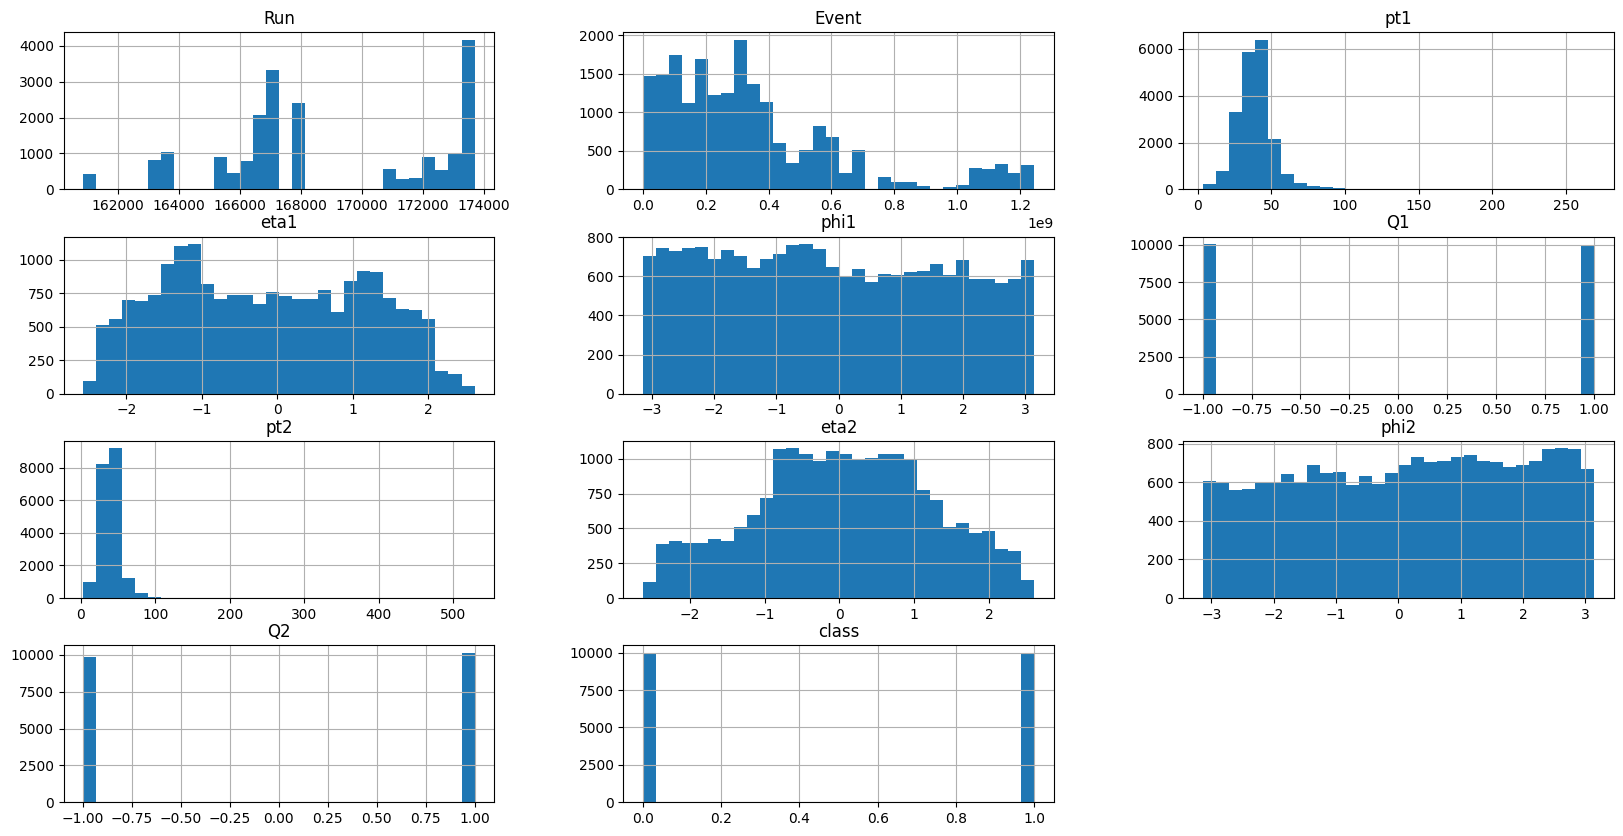

In [10]:
data.hist(bins=30, figsize=(20,10), layout=(4,3))
plt.show()

<Axes: >

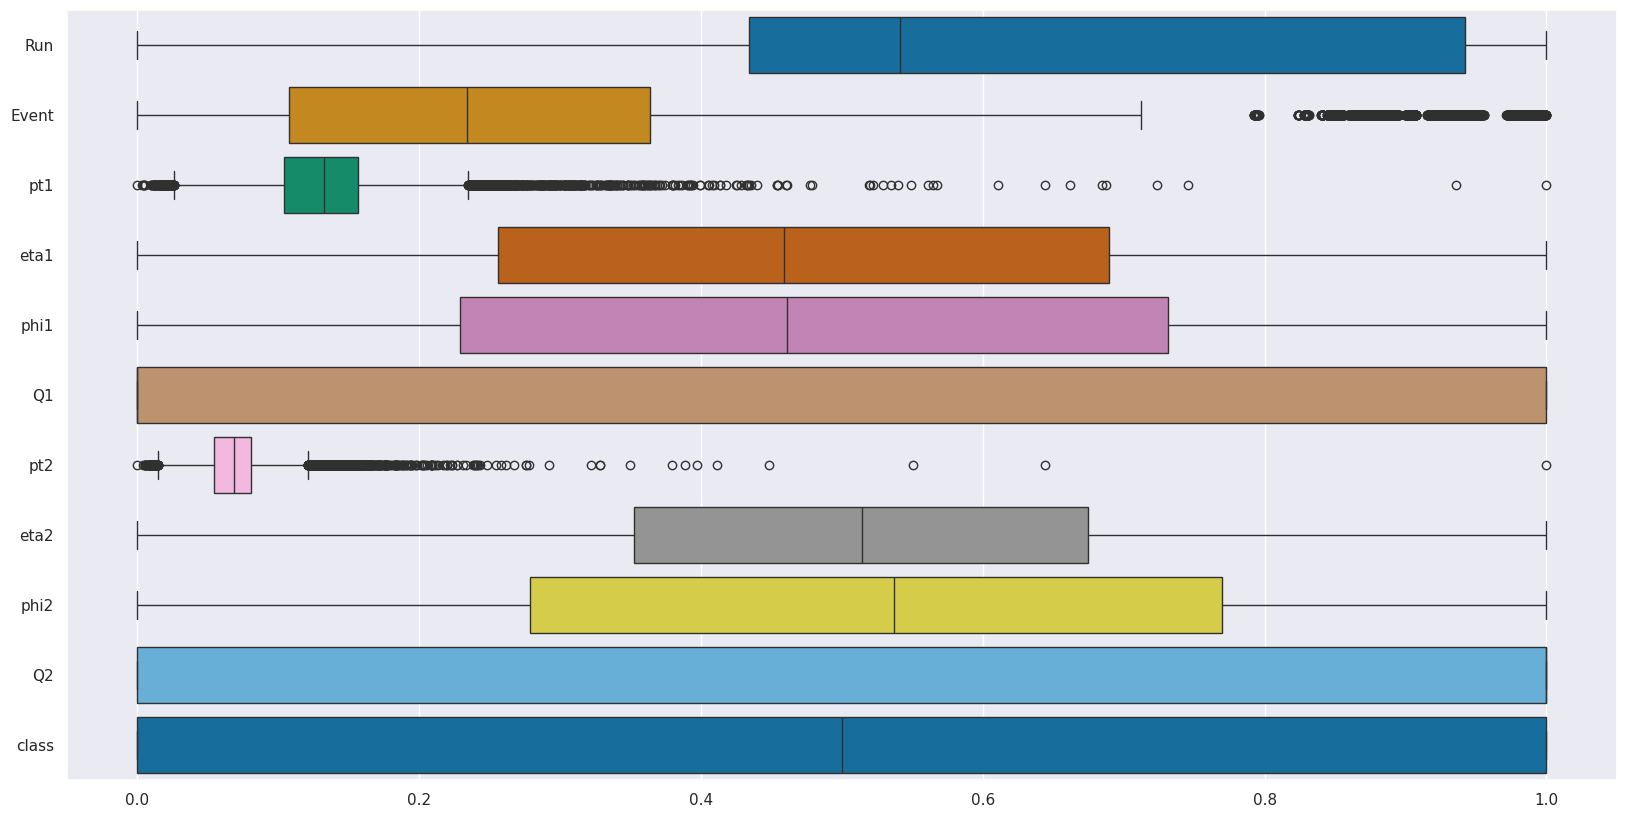

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
df = pd.DataFrame(scaled_data, columns = data.columns)

plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.boxplot(data=df, orient='h',palette="colorblind")

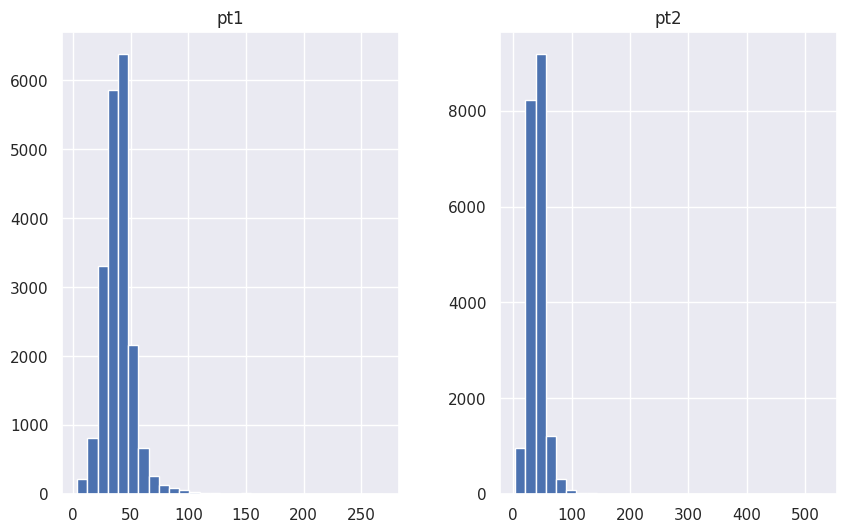

In [14]:
data[['pt1','pt2']].hist(bins=30, figsize=(10,6), layout=(1,2))
plt.show()

In [15]:
data["log(pt1)"] = data.pt1.apply(np.log1p)
data["log(pt2)"] = data.pt2.apply(np.log1p)
data = data.drop(['pt1', 'pt2'], axis=1)

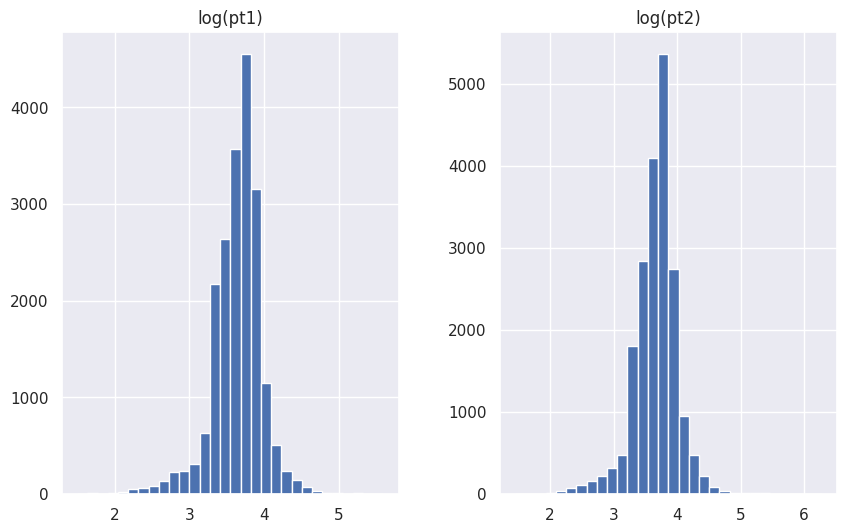

In [16]:
data[['log(pt1)','log(pt2)']].hist(bins=30, figsize=(10,6), layout=(1,2))
plt.show()

<Axes: >

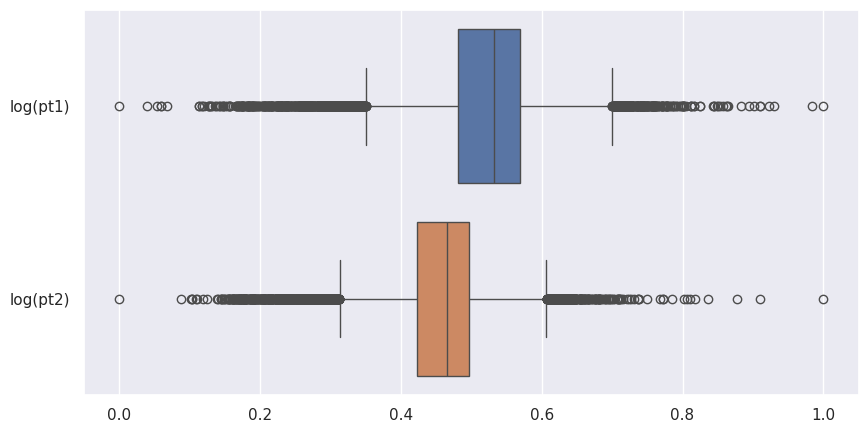

In [17]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['log(pt1)', 'log(pt2)']])
df = pd.DataFrame(scaled_data, columns=['log(pt1)', 'log(pt2)'])

plt.figure(figsize=(10,5))
sns.set(font_scale=1)
sns.boxplot(data=df, orient='h')

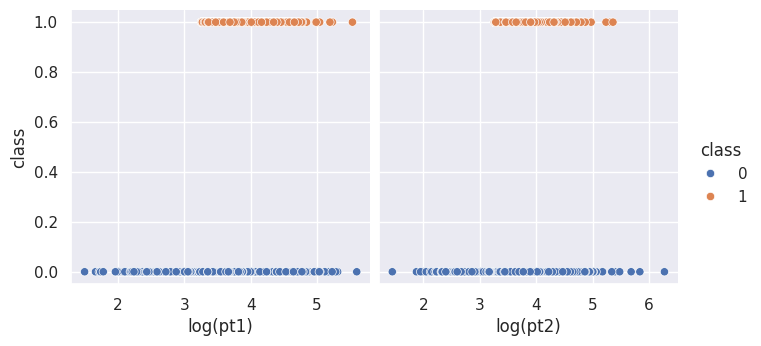

In [18]:
sns.pairplot(data, hue='class', y_vars=['class'], x_vars=data[['log(pt1)', 'log(pt2)']], height=3.5)

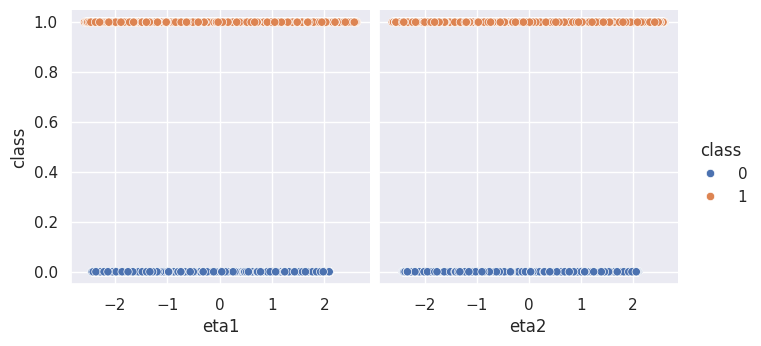

In [19]:
sns.pairplot(data, hue='class', y_vars=['class'], x_vars=data[['eta1','eta2']], height=3.5)

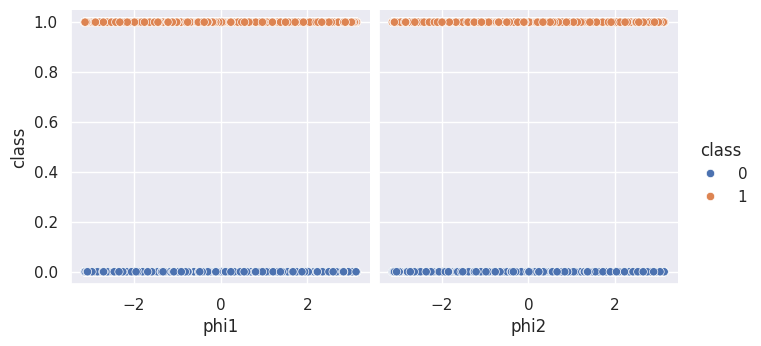

In [20]:
sns.pairplot(data, hue='class', y_vars=['class'], x_vars=data[['phi1','phi2']], height=3.5)

In [23]:
data = data[[col for col in data.columns if col != 'class'] + ['class']]
data

,Run,Event,eta1,phi1,Q1,eta2,phi2,Q2,log(pt1),log(pt2),class
0,166784,20257329,-1.3248,-3.0057,-1,-0.6624,0.3485,1,3.782210,3.767915,0
1,163261,64679856,-0.0057,-0.7744,-1,1.3710,2.2952,1,3.710504,3.621663,1
2,165570,196860468,-0.4162,0.9198,1,-0.2680,-1.4629,1,4.303113,3.702314,1
3,172163,497791581,0.3063,-1.6034,1,-1.6182,1.5315,-1,3.539323,3.340722,1
4,173692,550966077,0.4276,-0.3876,-1,-0.3080,2.8965,1,3.806276,3.427047,0
...,...,...,...,...,...,...,...,...,...,...,...
19995,163589,25170371,0.0434,2.8371,-1,-0.8716,-0.7647,1,3.692842,3.893317,0
19996,166033,486199311,-1.3922,-1.9531,-1,-0.9045,0.8390,1,3.674375,3.444665,0
19997,173389,687651225,-2.2673,-0.3794,-1,-1.8151,2.9126,-1,3.590826,3.644844,1
19998,172163,191162958,-2.2869,1.4960,-1,-2.1804,-1.0817,1,3.687694,3.902572,1


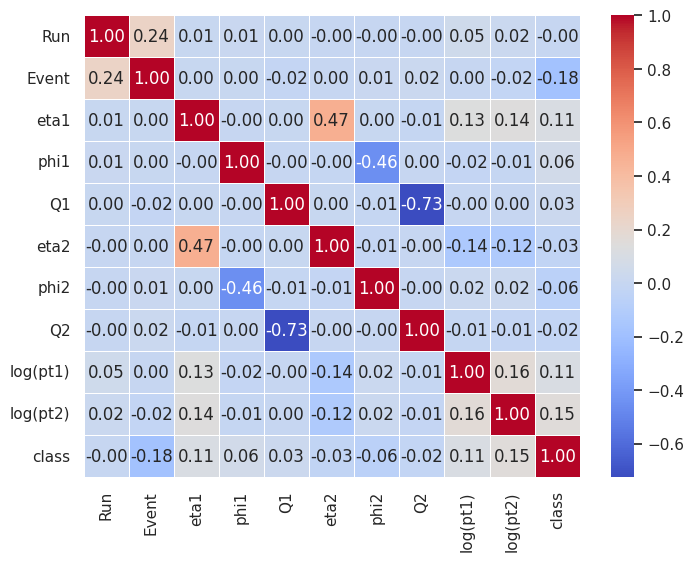

In [24]:
correlations = data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
x = data.drop('class',axis=1)
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35,random_state=10)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [28]:
model = DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=21)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=21)

In [29]:
predictions = model.predict(x_test)

train_accuracy = accuracy_score(y_train, model.predict(x_train))
test_accuracy = accuracy_score(y_test, predictions)
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.86
Testing Accuracy: 0.81


In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      3505
           1       0.83      0.78      0.81      3495

    accuracy                           0.81      7000
   macro avg       0.81      0.81      0.81      7000
weighted avg       0.81      0.81      0.81      7000



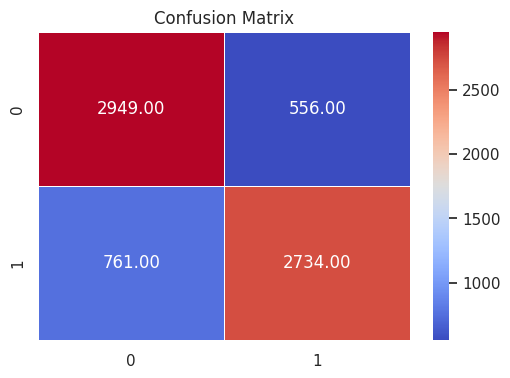

In [31]:
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Confusion Matrix')
plt.show()